/tmp/ipykernel_154147/1951467395.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=36, freq='M')


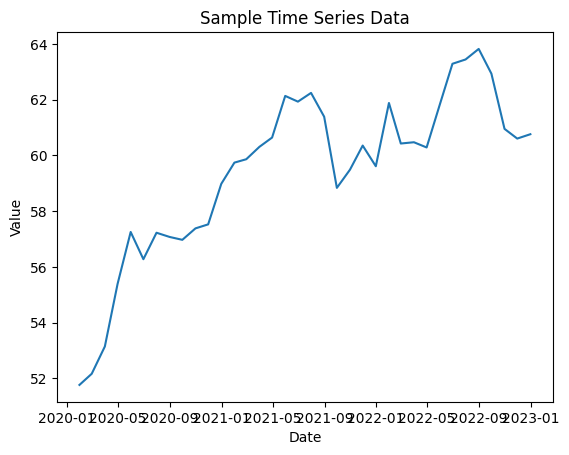

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -52.941
Date:                Mon, 14 Oct 2024   AIC                            111.883
Time:                        08:55:39   BIC                            116.549
Sample:                    01-31-2020   HQIC                           113.494
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3658      1.519      0.241      0.810      -2.610       3.342
ma.L1         -0.2475      1.551     -0.160      0.873      -3.288       2.793
sigma2         1.2054      0.316      3.815      0.0

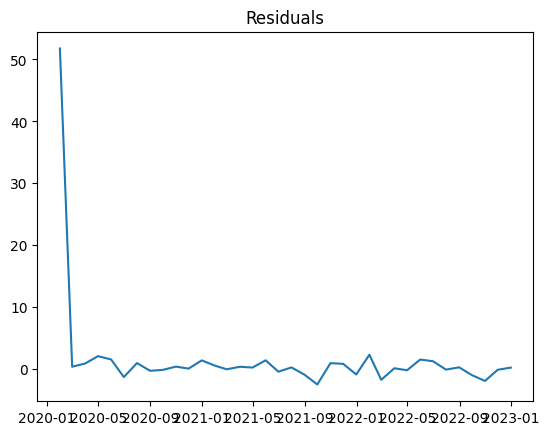

Forecasted Values:
2023-01-31    60.751256
2023-02-28    60.748548
2023-03-31    60.747558
2023-04-30    60.747195
2023-05-31    60.747063
Freq: ME, Name: predicted_mean, dtype: float64


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Generate example time series data (monthly data over 36 months)
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=36, freq='M')
data = pd.Series(np.random.randn(36).cumsum() + 50, index=dates)

# Plot the original time series data
plt.plot(data)
plt.title("Sample Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

# Fit ARIMA(p, d, q) model (example: ARIMA(1,1,1))
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the residuals to check for white noise
residuals = model_fit.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()

# Forecasting future values
forecast = model_fit.forecast(steps=5)
print("Forecasted Values:")
print(forecast)


## Using ACF and PACF Plots in ARIMA Model
#### Step 1: Load and Visualize the Time Series Data

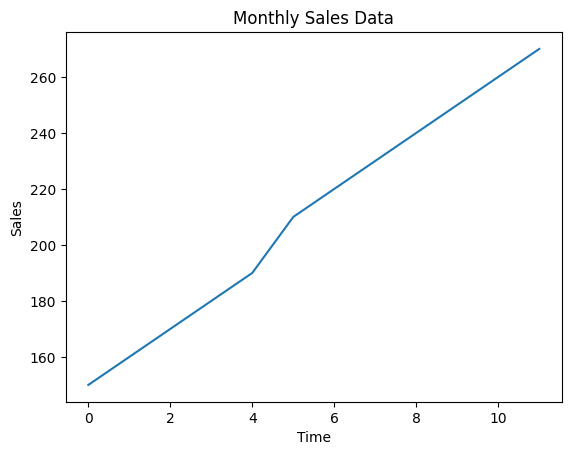

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Example time series data (monthly sales for 12 months)
data = [150, 160, 170, 180, 190, 210, 220, 230, 240, 250, 260, 270]
time_series = pd.Series(data)

# Plot the time series
plt.plot(time_series)
plt.title("Monthly Sales Data")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()


#### Step 2: Check Stationarity of the Time Series

Time series must be stationary for ARIMA models to work effectively. We can use differencing to make the data stationary if needed. A common method for checking stationarity is the Dickey-Fuller test or by visually examining the time series for trends. If the p-value is greater than 0.05, the data is likely non-stationary, and we may need to apply differencing.

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -7.50555349946496
p-value: 4.143863216472936e-11


#### Step 3: Apply Differencing to Make the Data Stationary

If the data is not stationary, we can apply differencing to remove trends or seasonality:

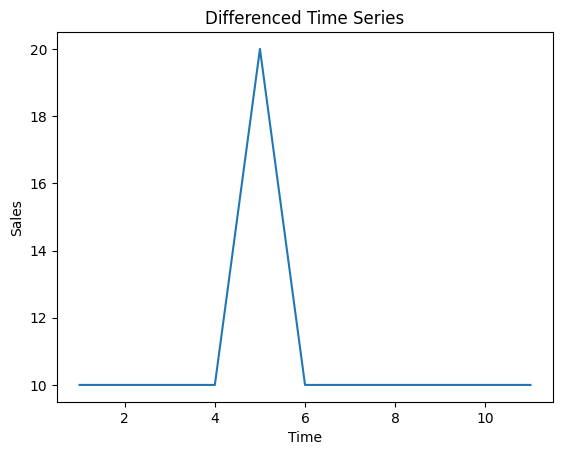

In [5]:
time_series_diff = time_series.diff().dropna()

# Plot differenced time series
plt.plot(time_series_diff)
plt.title("Differenced Time Series")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()


#### Step 4: Plot ACF and PACF

Now, we use ACF and PACF plots to determine the appropriate values for p (AR order) and q (MA order).

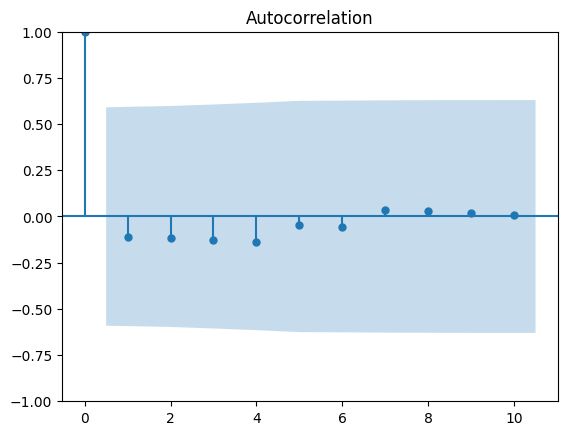

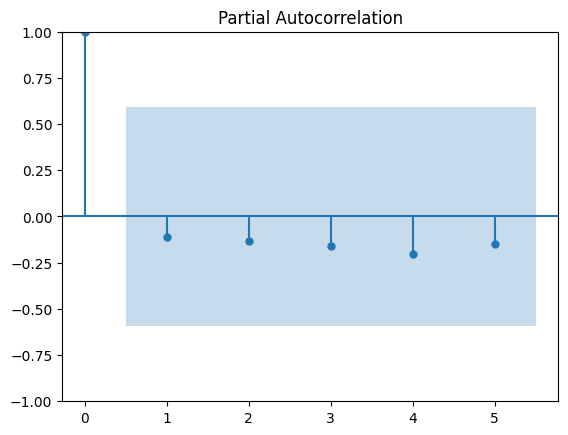

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot for the differenced data
plot_acf(time_series_diff, lags=10)
plt.show()

# PACF plot for the differenced data
plot_pacf(time_series_diff, lags=5)
plt.show()

#### Step 5: Interpret ACF and PACF
ACF Plot:
- The ACF plot helps us identify the q parameter (the lag order for the moving average).
- If the ACF shows a sharp cut-off after lag q, this indicates an MA(q) process.

PACF Plot:
- The PACF plot helps identify the p parameter (the lag order for the autoregressive part).
- If the PACF cuts off sharply after lag p, it suggests an AR(p) process.


#### Step 6: Fit the ARIMA Model

Now that we have identified the values for p, d, and q, we can fit the ARIMA model:

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: ARIMA(1, 1, 1))
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -30.232
Date:                Mon, 14 Oct 2024   AIC                             66.464
Time:                        09:02:07   BIC                             67.657
Sample:                             0   HQIC                            65.711
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.015     65.750      0.000       0.970       1.030
ma.L1         -0.9931     28.504     -0.035      0.972     -56.860      54.874
sigma2         9.1538    258.077      0.035      0.9

7. Step 7: Diagnose Residuals

Once the model is fit, it’s crucial to check if the residuals resemble white noise (i.e., they should have no significant autocorrelation). If the residuals show no significant spikes in the ACF plot, then the model is good and the residuals resemble white noise.

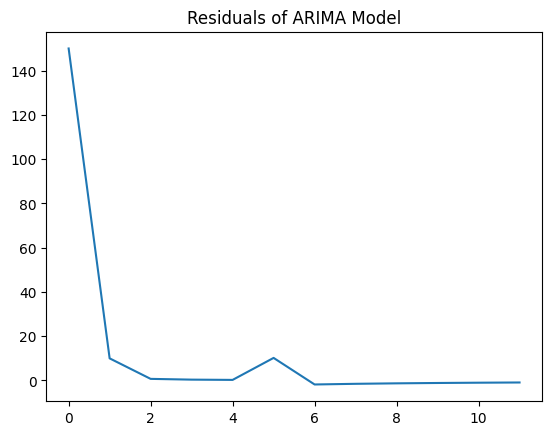

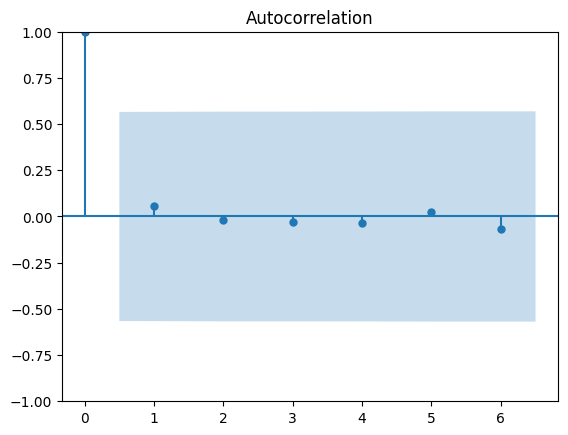

In [9]:
# Plot residuals
residuals = model_fit.resid
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# ACF of residuals to ensure there's no remaining autocorrelation
plot_acf(residuals)
plt.show()


8. Step 8: Forecasting

Now that the ARIMA model is fitted, we can use it for forecasting future values:

In [10]:
# Forecast next 10 periods
forecast = model_fit.forecast(steps=10)
print(forecast)

12    280.832946
13    291.665872
14    302.498779
15    313.331666
16    324.164533
17    334.997380
18    345.830207
19    356.663015
20    367.495803
21    378.328571
Name: predicted_mean, dtype: float64
